# Experiment 2

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



def f_df(path, method):
    abc = pd.read_pickle(path, compression='gzip')
    abc = abc.explode('tensor')
    abc[['method', 'tensor', 'token_next']] = abc['tensor'].to_list()
    abc = abc[abc['method'] == method].copy()
    abc['predicted_token_dist_from_start'] = abc[['tensor', 'token_next']].apply(lambda x : list(range(x['token_next'], x['token_next'] + len(x['tensor']))), axis=1)
    abc = abc.explode(column=['tensor', 'predicted_token_dist_from_start'])
    
    abc['first_token'] = abc.apply(lambda x : x['ignore'][x['first_token']]-1, axis=1)
    abc['second_token'] = abc.apply(lambda x : x['ignore'][x['second_token']]-1, axis=1)
    
    abc = abc[abc['first_token']!= abc['predicted_token_dist_from_start']]
    abc = abc[abc['second_token']!= abc['predicted_token_dist_from_start']]
    
    
    abc = abc[abc['first_token'] != abc['second_token']].copy()
    abc['tensor'] = abc['tensor'].apply(lambda x : float(x))
    abc = abc.reset_index(drop=True)
    abc['max_token'] = abc[['first_token', 'second_token']].max(axis=1)
    abc['min_dist'] = abc['predicted_token_dist_from_start'] - abc['max_token']
    abc['rem'] = abc.groupby(['posdis','min_dist'])['row_number'].transform(lambda x : x.count())
    return abc

def f_avg_df(path, method):
    import pickle
    abc = pickle.load(open(path,'rb'))
    abc = pd.DataFrame(abc, columns = ['tensor', 'posdis', 'row_number', 'first_token', 'second_token'])
    abc = abc[abc['posdis']<=7].copy()
    abc = abc.explode('tensor')
    abc[['method', 'tensor', 'token_next']] = abc['tensor'].to_list()
    abc = abc[abc['method'] == method].copy()
    abc['predicted_token_dist_from_start'] = abc[['tensor', 'token_next']].apply(lambda x : list(range(x['token_next'], x['token_next'] + len(x['tensor']))), axis=1)
    abc = abc.explode(column=['tensor', 'predicted_token_dist_from_start'])
    abc = abc[abc['first_token']!= abc['predicted_token_dist_from_start']]
    abc = abc[abc['second_token']!= abc['predicted_token_dist_from_start']]
    abc = abc[abc['first_token'] != abc['second_token']].copy()
    abc['tensor'] = abc['tensor'].apply(lambda x : float(x))
    abc = abc.reset_index(drop=True)
    abc['max_token'] = abc[['first_token', 'second_token']].max(axis=1)
    abc['min_dist'] = abc['predicted_token_dist_from_start'] - abc['max_token']
    abc['rem'] = abc.groupby(['posdis','min_dist'])['row_number'].transform(lambda x : x.count())
    return abc

def plot(strong_df, weak_df, avg_df):
    fig, axes = plt.subplots(2, 4, figsize=(30,10))
    
    for i in range(0, 4):
        for j in [0,1]:
            min_dist = j*4 + i + 1
            
            strong_line = sns.lineplot(data=strong_df[strong_df['min_dist'] ==min_dist], x="posdis", y="tensor", ax=axes[j][i], label='strong')
            weak_line = sns.lineplot(data=weak_df[weak_df['min_dist'] ==min_dist], x="posdis", y="tensor", ax=axes[j][i], label='weak')
            avg_line = sns.lineplot(data=avg_df[avg_df['min_dist'] == min_dist], x="posdis", y="tensor", ax=axes[j][i], label='avg')
            axes[j][i].set_title(f'$t_{{target}} - t_2$ = {min_dist}')
            axes[j][i].legend()
    plt.show()
            

In [2]:
version = '100_softmax'
load_avg = True
method = 1


In [3]:

weak_path = f'weak_mwe_gpt{version}.pkl'
weak_df = f_df(weak_path, method).drop(columns = ['ignore'])
weak_df = weak_df[weak_df['rem'] >= 50].copy()
display(weak_df)

/home/dsinghvi/miniconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


,tensor,posdis,row_number,first_token,second_token,method,token_next,predicted_token_dist_from_start,max_token,min_dist,rem
0,1.035831,1,2,24,23,1,25,25,24,1,112781.0
1,1.015264,1,2,24,23,1,25,26,24,2,112574.0
2,0.990079,1,2,24,23,1,25,27,24,3,111813.0
3,0.836391,1,2,24,23,1,25,28,24,4,110268.0
4,0.345599,1,2,24,23,1,25,29,24,5,107987.0
...,...,...,...,...,...,...,...,...,...,...,...
2748760,0.689440,1,104014,4,3,1,5,5,4,1,112781.0
2748761,0.857080,1,104014,4,3,1,5,6,4,2,112574.0
2748762,0.454619,1,104014,4,3,1,5,7,4,3,111813.0
2748763,0.227409,1,104014,4,3,1,5,8,4,4,110268.0


/home/dsinghvi/miniconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


,tensor,posdis,row_number,first_token,second_token,method,token_next,predicted_token_dist_from_start,max_token,min_dist,rem
0,1.135464,1,205,15,14,1,16,16,15,1,1531
1,0.978263,1,205,15,14,1,16,17,15,2,1530
2,0.553755,1,205,15,14,1,16,18,15,3,1525
3,0.622591,1,205,15,14,1,16,19,15,4,1513
4,1.154996,1,205,15,14,1,16,20,15,5,1478
...,...,...,...,...,...,...,...,...,...,...,...
48815,0.918747,1,103812,38,37,1,39,45,38,7,1415
48816,0.958943,1,103812,38,37,1,39,46,38,8,1369
48817,0.950891,1,103812,38,37,1,39,47,38,9,1309
48818,1.018417,1,103812,38,37,1,39,48,38,10,1250


/home/dsinghvi/miniconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


,tensor,posdis,row_number,first_token,second_token,method,token_next,predicted_token_dist_from_start,max_token,min_dist,rem
0,0.598986,1,2,1,2,1,3,3,2,1,48174.0
1,1.338643,1,2,1,2,1,3,4,2,2,48172.0
2,1.713862,1,2,1,2,1,3,5,2,3,48165.0
3,0.760269,1,2,1,2,1,3,6,2,4,48136.0
4,0.681619,1,2,1,2,1,3,7,2,5,48077.0
...,...,...,...,...,...,...,...,...,...,...,...
7649563,0.008604,7,104000,7,14,1,15,33,14,19,26385.0
7649564,0.002336,7,104000,7,14,1,15,34,14,20,25005.0
7649565,0.418010,7,104000,7,14,1,15,35,14,21,23602.0
7649566,0.484936,7,104000,7,14,1,15,36,14,22,21771.0


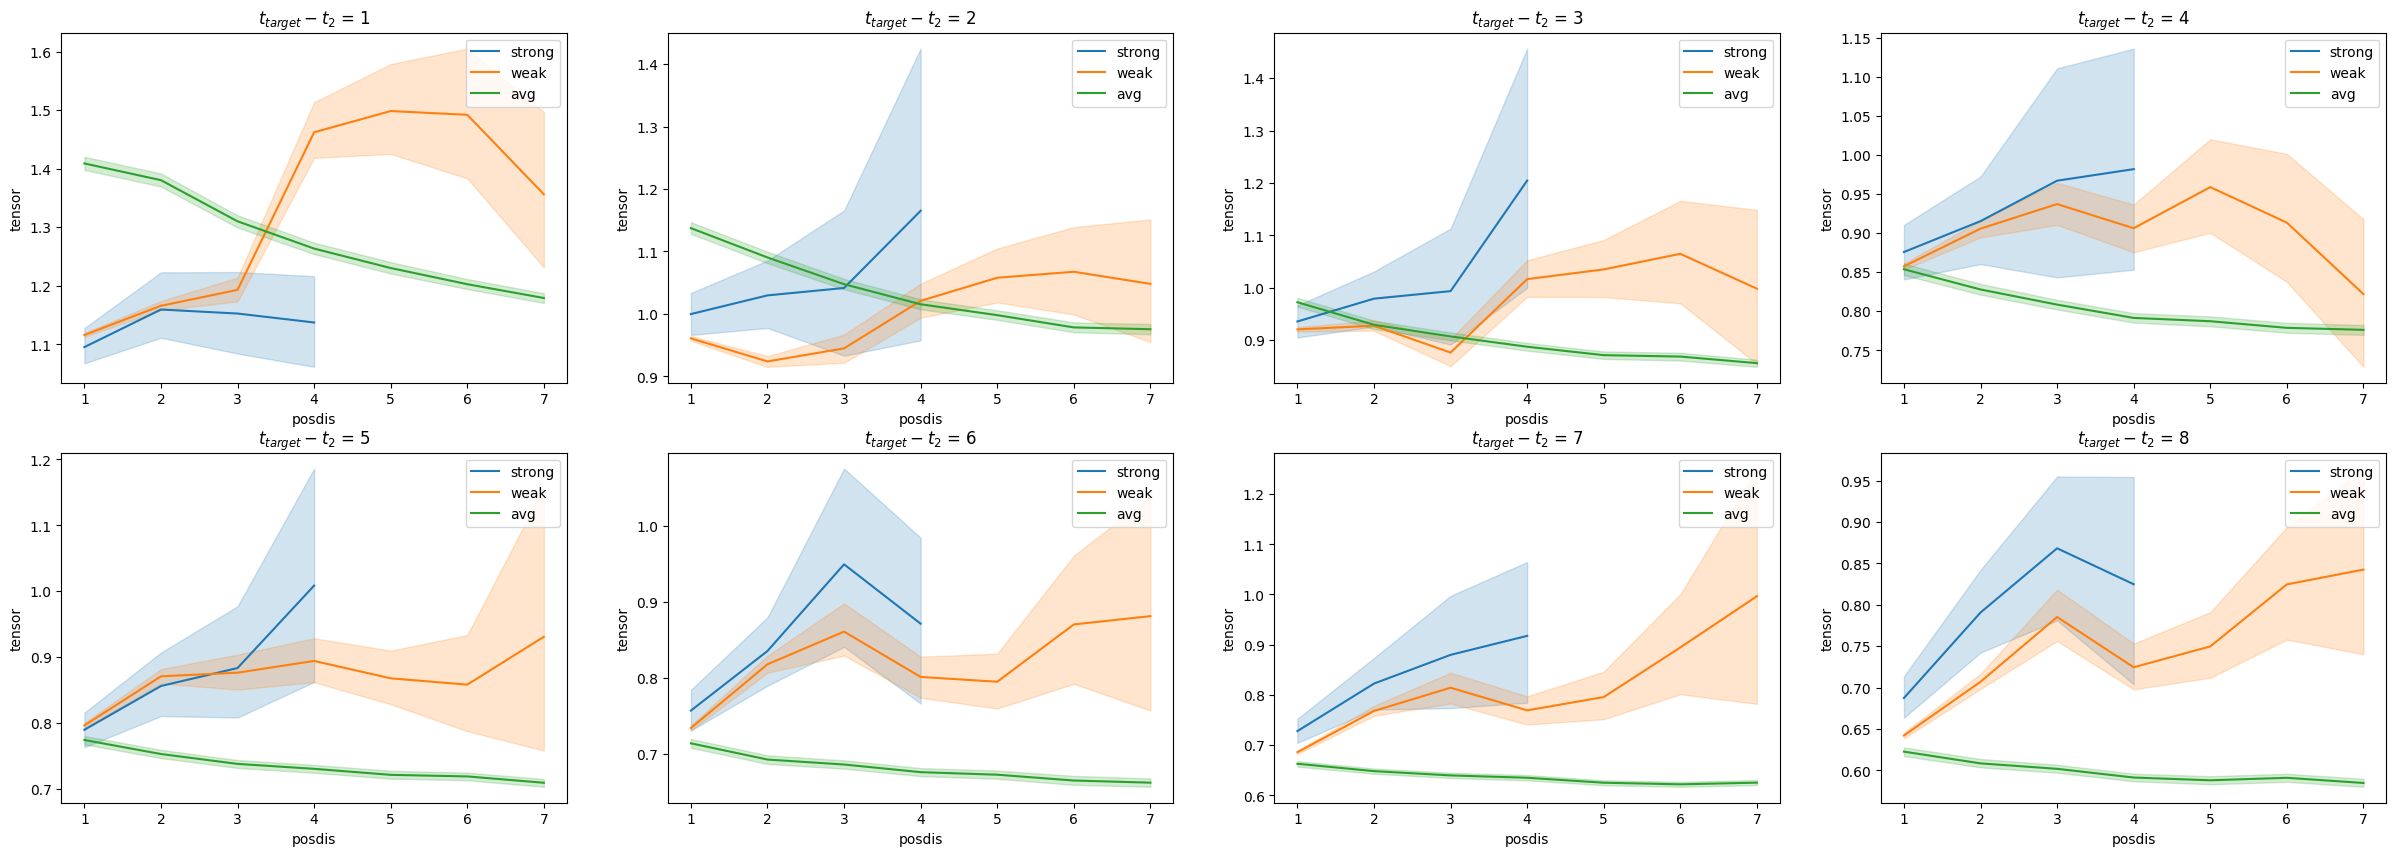

In [4]:
if load_avg:
    strong_path = f'strong_mwe_gpt{version}.pkl'
    strong_df = f_df(strong_path, method).drop(columns = ['ignore'])
    strong_df = strong_df[strong_df['rem'] >= 50].copy()
    display(strong_df)
    
    avg_df = f_avg_df(f'avg_gpt{version}.pkl', method)
    avg_df = avg_df[avg_df['rem'] >= 50].copy()
    display(avg_df)



if load_avg:
    plot(strong_df, weak_df, avg_df)

    # del strong_df, weak_df, avg_df
    

In [5]:
# Remove tokens which are part of same words. 
# 
import pandas as pd
ap = []
for i in [0, 1, 2, 3]:
    print(i)
    abc = pd.read_pickle(f'../mwe_tagger/gpt_gpt.pkl_{i}').drop(columns = ['sentence', 'd', 'toks', 'tags', '_', '~', 'lemmas', 'tokens', 'sent',
       'syntactic_distance_idx', 'tokens_to_map', 'token_map', 'token_map_dict', 'weak_mwe', 'strong_mwe'])
    def foo(x):
        g = {}
        for tup, val in x.items():
            if len(tup) == 2: 
                for a in tup[0]:
                    for b in tup[1]:
                        g[(a, b)] = val
        return g
    abc['syntactic_distance_idx_mapped'] = abc['syntactic_distance_idx_mapped'].apply(foo)
    ab = abc.reset_index().rename(columns = {'index':'row_number'})
    ap.append(weak_df.merge(ab[['row_number', 'syntactic_distance_idx_mapped']], on = ['row_number']))


ap = pd.concat(ap)
ap['syntactic_distance_idx_mapped'] = ap[['syntactic_distance_idx_mapped', 'first_token', 'second_token']].apply(lambda x : x['syntactic_distance_idx_mapped'].get((x['first_token'], x['second_token']), -100), axis=1)

0
1
2
3


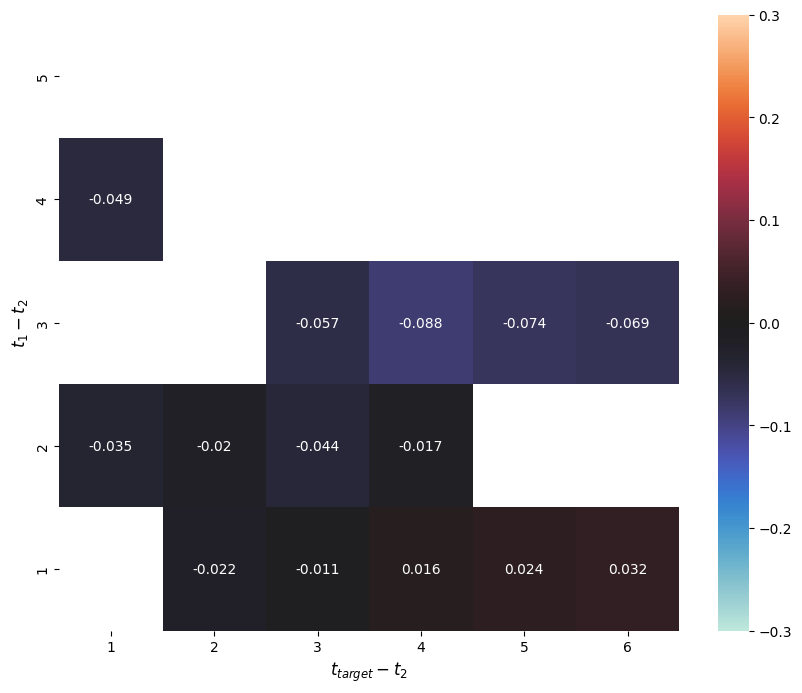

In [9]:
import numpy as np
zp = ap.copy()
zp['ct'] = zp.groupby(['posdis', 'min_dist', 'syntactic_distance_idx_mapped'])['tensor'].transform(lambda x : x.count())
zp = zp[zp['ct']>50]
zp = zp[zp['syntactic_distance_idx_mapped']>0]
zp = zp[zp['syntactic_distance_idx_mapped']<=6]
zp['diff_syn'] = zp.groupby(['posdis', 'min_dist'])['syntactic_distance_idx_mapped'].transform(lambda x : x.min())
zp = zp[zp['diff_syn']==1]
# zp['diff_syn'] = zp.groupby(['posdis', 'min_dist'])['syntactic_distance_idx_mapped'].transform(lambda x : x.nunique())
# zp = zp[zp['diff_syn']>=3]



from scipy.stats import pearsonr, spearmanr
# z = zp.groupby(['posdis', 'min_dist'])[['tensor','syntactic_distance_idx_mapped']].corr(method=lambda x, y: pearsonr(x, y)[0])
# y = zp.groupby(['posdis', 'min_dist'])[['tensor','syntactic_distance_idx_mapped']].corr(method=lambda x, y: pearsonr(x, y)[1])

z = zp.groupby(['posdis', 'min_dist'])[['tensor','syntactic_distance_idx_mapped']].corr(method=lambda x, y: spearmanr(x, y)[0])
y = zp.groupby(['posdis', 'min_dist'])[['tensor','syntactic_distance_idx_mapped']].corr(method=lambda x, y: spearmanr(x, y)[1])


y = y['syntactic_distance_idx_mapped'].reset_index()
y = y[y['level_2'] == 'tensor']
mask_apq = y[y['min_dist'].abs()<=6].drop(columns = ['level_2']).set_index([ 'posdis', 'min_dist']).unstack()
mask_apq.columns = [x[1] for x in mask_apq.columns]
mask_apq = mask_apq[::-1]
mask_apq = np.where(mask_apq > 0.05, np.nan, 1)


z = z['syntactic_distance_idx_mapped'].reset_index()
z = z[z['level_2'] == 'tensor']
apq = z[z['min_dist'].abs()<=6].drop(columns = ['level_2']).set_index([ 'posdis', 'min_dist']).unstack()
apq.columns = [x[1] for x in apq.columns]
apq = apq[::-1]
apq = apq * mask_apq


plt.figure(figsize=(10,8))

ax = sns.heatmap(apq, annot=True, center=0, vmin= -0.3, vmax=0.3)
plt.xlabel('$t_{target} - t_2$', fontsize = 12) # x-axis label with fontsize 15
plt.ylabel('$t_1 - t_2$', fontsize = 12) # y-axis label with fontsize 15

plt.show()

# Experiment 3

In [4]:
def plot_mlm(strong_df, weak_df, avg_df):
    fig, axes = plt.subplots(4, 4, figsize=(30,20))
    
    for i in range(0, 4):
        for j in range(4):
            min_dist = j*4 + i + 1 - 8
            
            
            strong_line = sns.lineplot(data=strong_df[strong_df['min_dist'] ==min_dist], x="posdis", y="tensor", ax=axes[j][i], label='strong')
            weak_line = sns.lineplot(data=weak_df[weak_df['min_dist'] ==min_dist], x="posdis", y="tensor", ax=axes[j][i], label='weak')
            avg_line = sns.lineplot(data=avg_df[avg_df['min_dist'] == min_dist], x="posdis", y="tensor", ax=axes[j][i], label='avg')
    
            # axes[j][i].set_title('Comparison of strong vs avg vs weak mwe over fixed positional distances')
            
            axes[j][i].set_title(f'$t_{{target}} - t_2$ = {min_dist}')
            axes[j][i].legend()
    plt.show()        

In [5]:
version = 10000
load_avg = True
method = 1
model = 'bert'


    
weak_path = f'weak_mwe_{model}{version}.pkl'
weak_df = f_df(weak_path, method).drop(columns = ['ignore'])
weak_df = weak_df[weak_df['rem'] >= 50].copy()
display(weak_df)

/home/dsinghvi/miniconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


,tensor,posdis,row_number,first_token,second_token,method,token_next,predicted_token_dist_from_start,max_token,min_dist,rem
0,0.087059,1,2,30,29,1,0,0,30,-30,19022
1,0.518814,1,2,30,29,1,0,1,30,-29,21043
2,0.337648,1,2,30,29,1,0,2,30,-28,23124
3,0.001986,1,2,30,29,1,0,3,30,-27,25317
4,0.001548,1,2,30,29,1,0,4,30,-26,27643
...,...,...,...,...,...,...,...,...,...,...,...
6344319,0.127917,1,104014,4,3,1,0,6,4,2,127574
6344320,0.000292,1,104014,4,3,1,0,7,4,3,127124
6344321,0.000131,1,104014,4,3,1,0,8,4,4,126505
6344322,0.009992,1,104014,4,3,1,0,9,4,5,122489


/home/dsinghvi/miniconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


,tensor,posdis,row_number,first_token,second_token,method,token_next,predicted_token_dist_from_start,max_token,min_dist,rem
0,0.149699,1,205,16,15,1,0,0,16,-16,748
1,0.041971,1,205,16,15,1,0,1,16,-15,793
2,0.000002,1,205,16,15,1,0,2,16,-14,846
3,0.000216,1,205,16,15,1,0,3,16,-13,909
4,0.008654,1,205,16,15,1,0,4,16,-12,966
...,...,...,...,...,...,...,...,...,...,...,...
105546,0.152959,1,103805,14,13,1,0,27,14,13,1127
105547,0.008555,1,103805,14,13,1,0,28,14,14,1072
105548,0.001596,1,103805,14,13,1,0,29,14,15,1014
105549,0.000021,1,103805,14,13,1,0,30,14,16,960


/home/dsinghvi/miniconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


,tensor,posdis,row_number,first_token,second_token,method,token_next,predicted_token_dist_from_start,max_token,min_dist,rem
0,0.083434,1,2,1,2,1,0,0,2,-2,3520
1,0.005336,1,2,1,2,1,0,3,2,1,3754
2,0.003658,1,2,1,2,1,0,4,2,2,3754
3,0.000008,1,2,1,2,1,0,5,2,3,3754
4,0.004939,1,2,1,2,1,0,6,2,4,3753
...,...,...,...,...,...,...,...,...,...,...,...
878996,0.105709,7,7996,11,18,1,0,31,18,13,2721
878997,0.001048,7,7996,11,18,1,0,32,18,14,2641
878998,0.087850,7,7996,11,18,1,0,33,18,15,2558
878999,0.000034,7,7996,11,18,1,0,34,18,16,2453


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


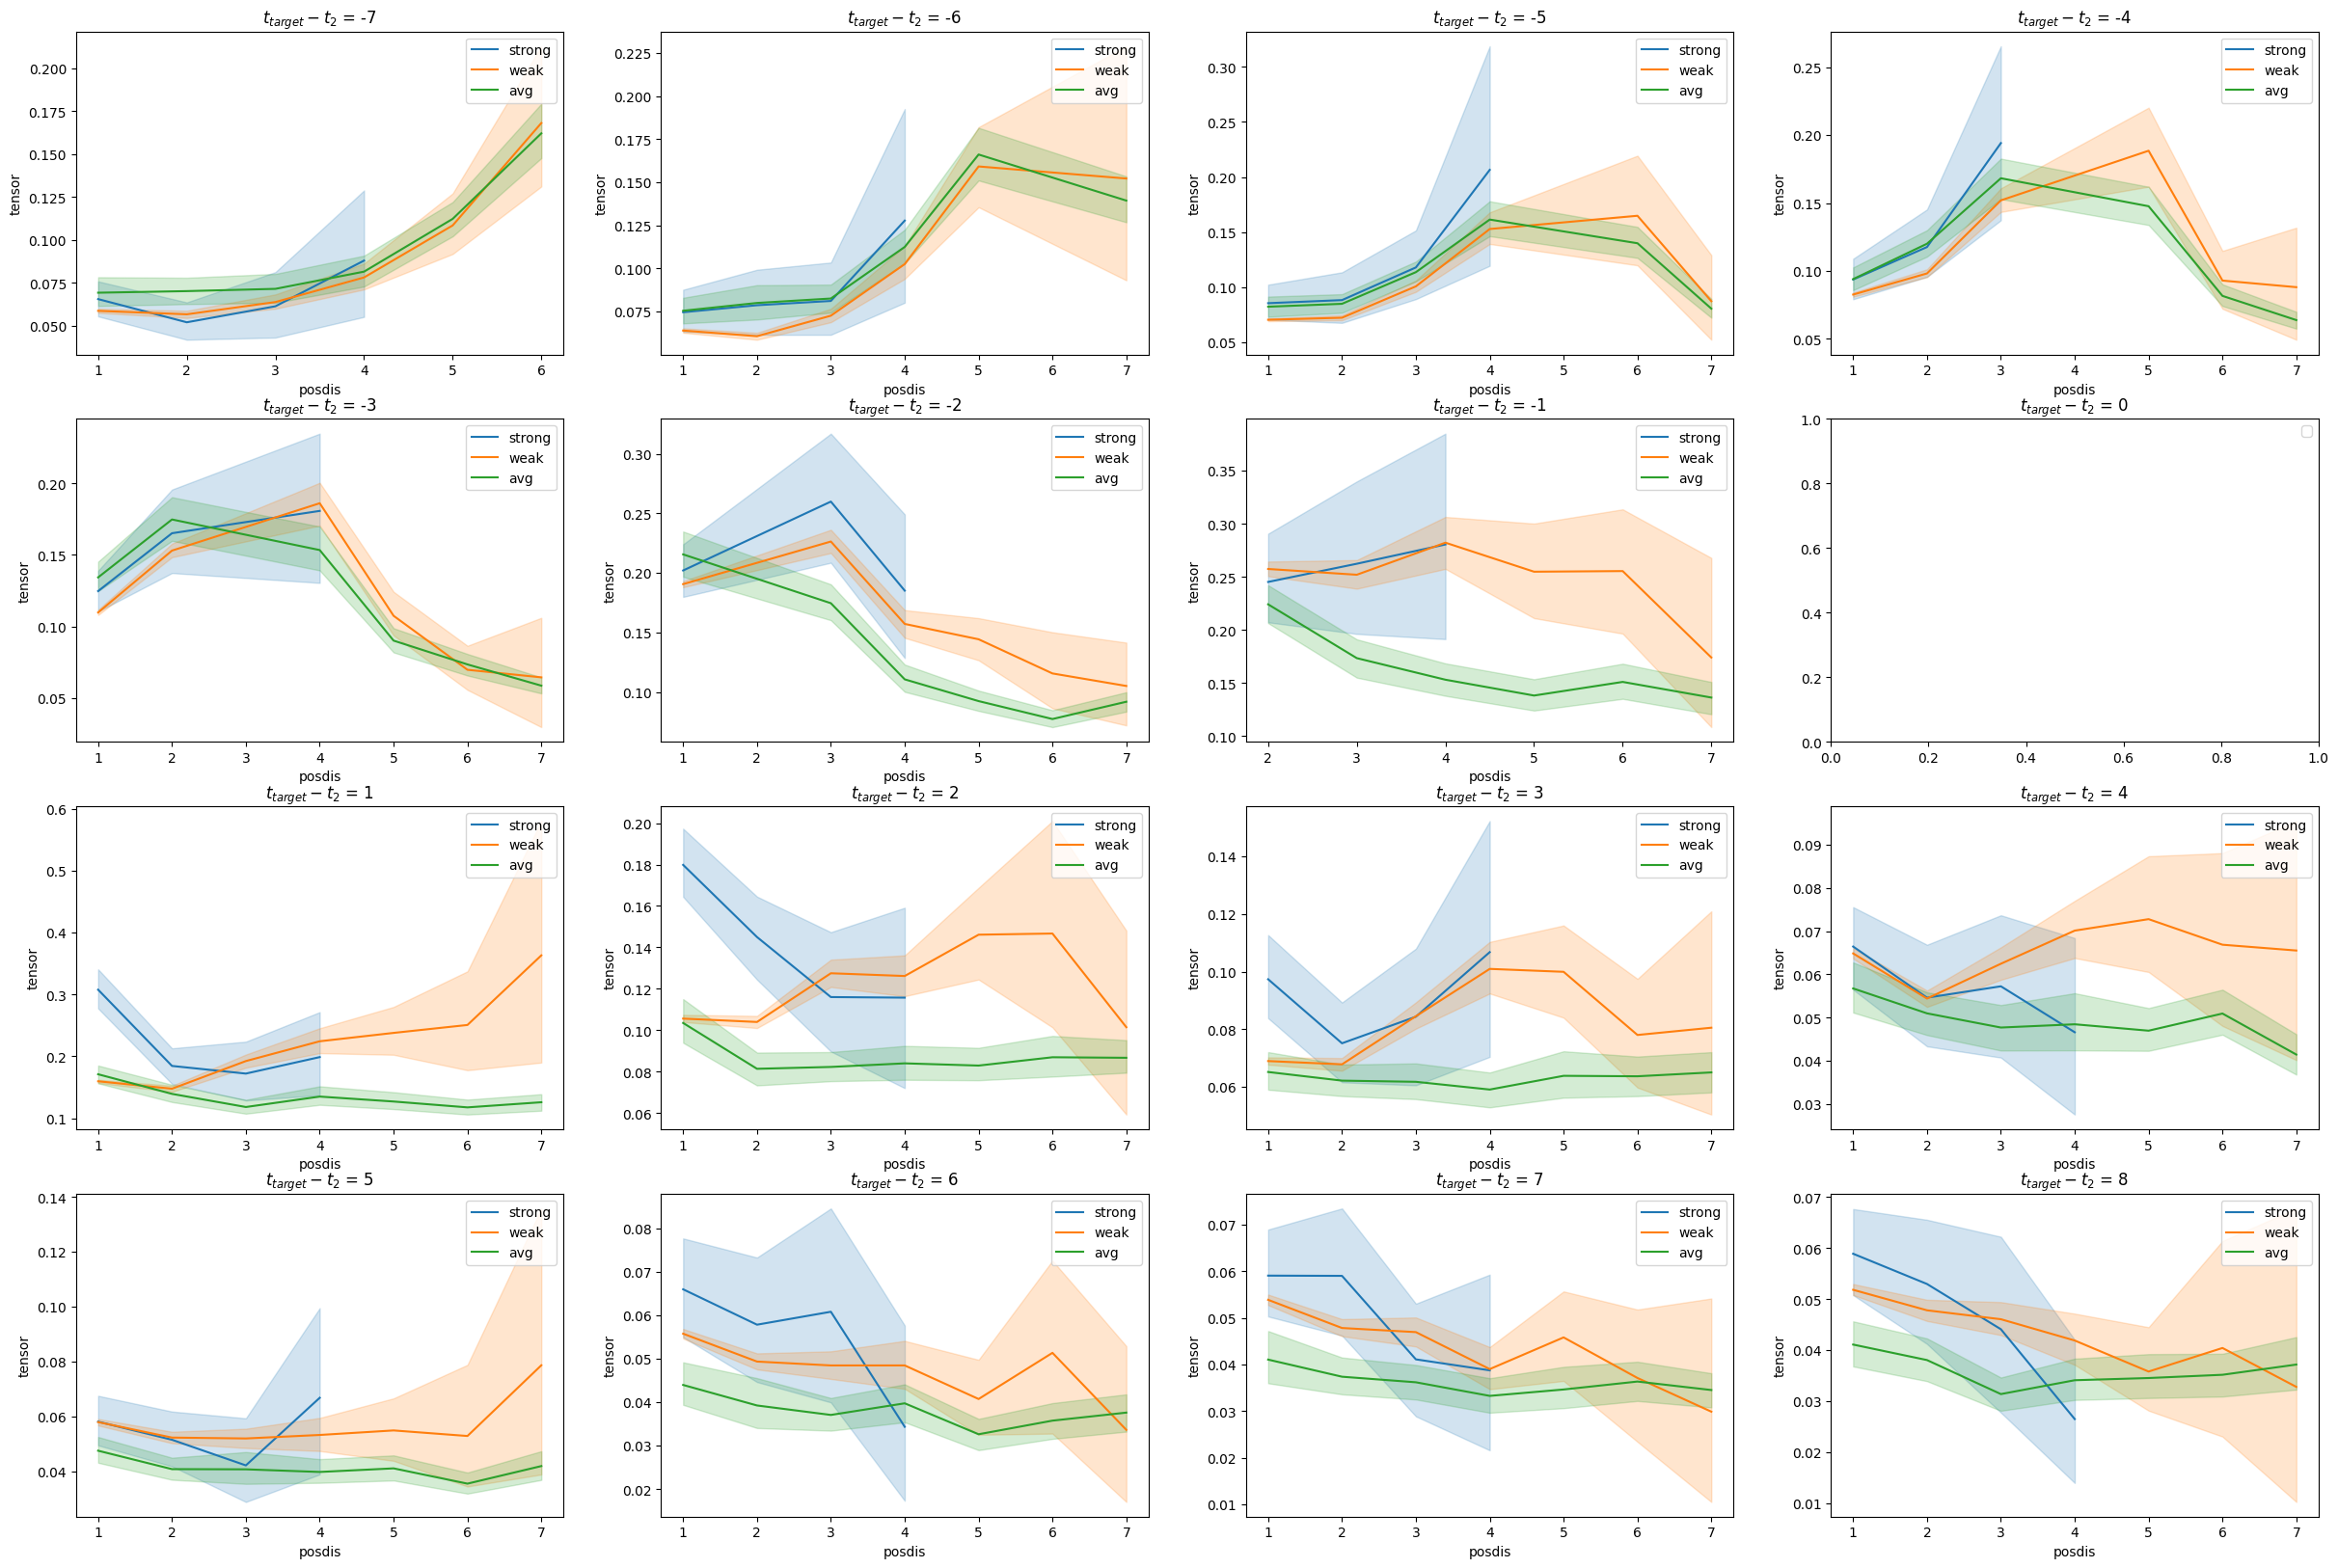

In [9]:
if load_avg:
    strong_path = f'strong_mwe_{model}{version}.pkl'
    strong_df = f_df(strong_path, method).drop(columns = ['ignore'])
    strong_df = strong_df[strong_df['rem'] >= 50].copy()
    display(strong_df)
    
    avg_df = f_avg_df(f'avg_{model}{version}.pkl', method)
    avg_df = avg_df[avg_df['rem'] >= 50].copy()
    display(avg_df)



if load_avg:
    plot_mlm(strong_df, weak_df, avg_df)

    # del strong_df, weak_df, avg_df
    

In [6]:
import pandas as pd
ap = []
for i in [0, 1, 2, 3]:
    abc = pd.read_pickle(f'../mwe_tagger/bert_bert.pkl_{i}')
    ab = abc.reset_index().rename(columns = {'index':'row_number'})
    ap.append(weak_df.merge(ab[['row_number', 'syntactic_distance_idx_mapped']], on = ['row_number']))

ap = pd.concat(ap)
ap['syntactic_distance_idx_mapped'] = ap[['syntactic_distance_idx_mapped', 'first_token', 'second_token']].apply(lambda x : x['syntactic_distance_idx_mapped'].get((x['first_token'], x['second_token']), -100), axis=1)

In [7]:
# import numpy as np
# zp = ap.copy()
# zp['ct'] = zp.groupby(['posdis', 'min_dist', 'syntactic_distance_idx_mapped'])['tensor'].transform(lambda x : x.count())
# zp = zp[zp['ct']>50]
# # zp = zp[zp['syntactic_distance_idx_mapped']>0]
# zp = zp[zp['syntactic_distance_idx_mapped']>=0]
# zp = zp[zp['syntactic_distance_idx_mapped']<=6]
# zp['diff_syn'] = zp.groupby(['posdis', 'min_dist'])['syntactic_distance_idx_mapped'].transform(lambda x : x.min())
# # zp = zp[zp['diff_syn']==1]
# # zp['diff_syn'] = zp.groupby(['posdis', 'min_dist'])['syntactic_distance_idx_mapped'].transform(lambda x : x.nunique())
# # zp = zp[zp['diff_syn']>=3]



# from scipy.stats import pearsonr, spearmanr
# # z = zp.groupby(['posdis', 'min_dist'])[['tensor','syntactic_distance_idx_mapped']].corr(method=lambda x, y: pearsonr(x, y)[0])
# # y = zp.groupby(['posdis', 'min_dist'])[['tensor','syntactic_distance_idx_mapped']].corr(method=lambda x, y: pearsonr(x, y)[1])

# z = zp.groupby(['posdis', 'min_dist'])[['tensor','syntactic_distance_idx_mapped']].corr(method=lambda x, y: spearmanr(x, y)[0])
# y = zp.groupby(['posdis', 'min_dist'])[['tensor','syntactic_distance_idx_mapped']].corr(method=lambda x, y: spearmanr(x, y)[1])


# y = y['syntactic_distance_idx_mapped'].reset_index()
# y = y[y['level_2'] == 'tensor']
# mask_apq = y[y['min_dist'].abs()<=6].drop(columns = ['level_2']).set_index([ 'posdis', 'min_dist']).unstack()
# mask_apq.columns = [x[1] for x in mask_apq.columns]
# mask_apq = mask_apq[::-1]
# mask_apq = np.where(mask_apq > 0.05, np.nan, 1)
# # mask_apq = np.where(mask_apq > 0.05, 1, 1)


# z = z['syntactic_distance_idx_mapped'].reset_index()
# z = z[z['level_2'] == 'tensor']
# apq = z[z['min_dist'].abs()<=6].drop(columns = ['level_2']).set_index([ 'posdis', 'min_dist']).unstack()
# apq.columns = [x[1] for x in apq.columns]
# apq = apq[::-1]
# apq = apq * mask_apq


# plt.figure(figsize=(10,8))

# ax = sns.heatmap(apq, annot=True, center=0, vmin= -0.2, vmax=0.2)
# plt.xlabel('$t_{target} - t_2$', fontsize = 15) # x-axis label with fontsize 15
# plt.ylabel('$t_1 - t_2$', fontsize = 12) # y-axis label with fontsize 15

# plt.show()

/home/dsinghvi/miniconda3/envs/py38/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/home/dsinghvi/miniconda3/envs/py38/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


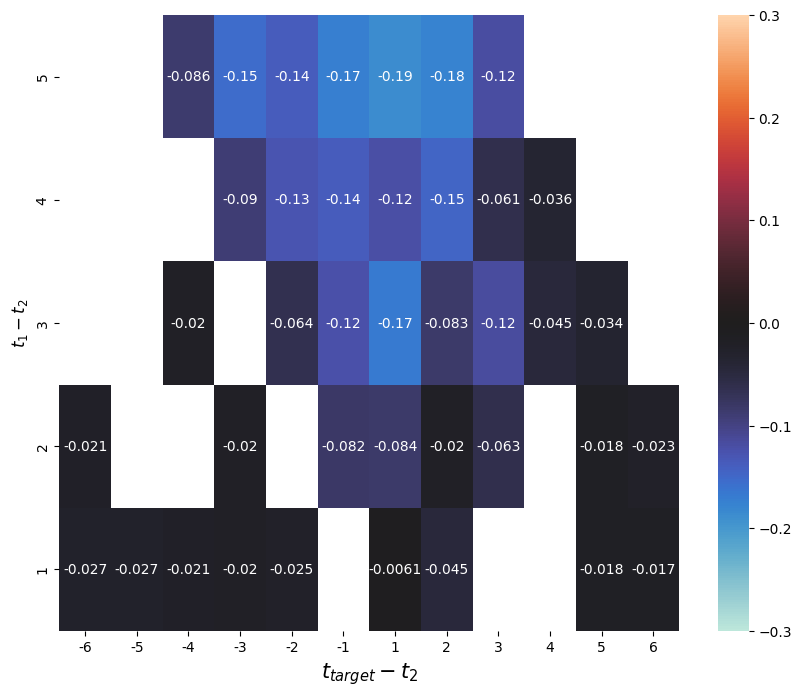

In [8]:
import numpy as np
zp = ap.copy()
zp['ct'] = zp.groupby(['posdis', 'min_dist', 'syntactic_distance_idx_mapped'])['tensor'].transform(lambda x : x.count())
zp = zp[zp['ct']>100]
# zp = zp[zp['syntactic_distance_idx_mapped']>0]
zp = zp[zp['syntactic_distance_idx_mapped']>0]
zp = zp[zp['syntactic_distance_idx_mapped']<=6]
zp['diff_syn'] = zp.groupby(['posdis', 'min_dist'])['syntactic_distance_idx_mapped'].transform(lambda x : x.min())
zp = zp[zp['diff_syn']==1]
# zp['diff_syn'] = zp.groupby(['posdis', 'min_dist'])['syntactic_distance_idx_mapped'].transform(lambda x : x.nunique())
# zp = zp[zp['diff_syn']>=3]



from scipy.stats import pearsonr, spearmanr
# z = zp.groupby(['posdis', 'min_dist'])[['tensor','syntactic_distance_idx_mapped']].corr(method=lambda x, y: pearsonr(x, y)[0])
# y = zp.groupby(['posdis', 'min_dist'])[['tensor','syntactic_distance_idx_mapped']].corr(method=lambda x, y: pearsonr(x, y)[1])

z = zp.groupby(['posdis', 'min_dist'])[['tensor','syntactic_distance_idx_mapped']].corr(method=lambda x, y: spearmanr(x, y)[0])
y = zp.groupby(['posdis', 'min_dist'])[['tensor','syntactic_distance_idx_mapped']].corr(method=lambda x, y: spearmanr(x, y)[1])


y = y['syntactic_distance_idx_mapped'].reset_index()
y = y[y['level_2'] == 'tensor']
mask_apq = y[y['min_dist'].abs()<=6].drop(columns = ['level_2']).set_index([ 'posdis', 'min_dist']).unstack()
mask_apq.columns = [x[1] for x in mask_apq.columns]
mask_apq = mask_apq[::-1]
mask_apq = np.where(mask_apq > 0.05, np.nan, 1)
# mask_apq = np.where(mask_apq > 0.05, 1, 1)


z = z['syntactic_distance_idx_mapped'].reset_index()
z = z[z['level_2'] == 'tensor']
apq = z[z['min_dist'].abs()<=6].drop(columns = ['level_2']).set_index([ 'posdis', 'min_dist']).unstack()
apq.columns = [x[1] for x in apq.columns]
apq = apq[::-1]
apq = apq * mask_apq


plt.figure(figsize=(10,8))

ax = sns.heatmap(apq, annot=True, center=0, vmin= -0.3, vmax=0.3)
plt.xlabel('$t_{target} - t_2$', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('$t_1 - t_2$', fontsize = 12) # y-axis label with fontsize 15

plt.show()

In [ ]:
sns.lineplot(zp[(zp['posdis'] == 5) & (zp['min_dist'] ==6)][['tensor', 'syntactic_distance_idx_mapped']], x = 'syntactic_distance_idx_mapped', y = 'tensor')